# ENSO example notebook

This notebook contains an example of data access on wilma (CNR) machine of ERA5 and evaluation of the ENSO teleconnection with aqua libraries and an example of the plotting routines.

In [1]:
import cftime
import dask
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from index import *
from plots import *
from tools import *

## Teleconnection and machine details configuration

Details such as teleconnection coordinates, folder input/output are obtained with functions collected in the `tools.py` file, that access details from a `yaml` file.
Machine and diagnostic needs to be specified.
Details about the ENSO teleconnection can be accessed by specificing the teleconnection name as a string.

In [2]:
machine   = 'wilma'
diagname  = 'teleconnections'
telecname = 'ENSO'

config   = load_config(machine)
namelist = load_namelist(diagname)

`config` and `namelist` contain now the detail about the machine and the teleconnections diagnostic.

## Index evaluation

The ENSO index can be evaluated by using the library function `regional_mean_index` from the `index.py` file.

The index can be evaluated with a custom rolling window to average data (standard is 3 months).

In [3]:
infile = config[diagname][telecname]['input']
field = xr.open_mfdataset(infile)[config[diagname][telecname]['var']]

enso = regional_mean_index(field,namelist,telecname)

Index time serie is returned as a DataArray.

In [4]:
enso

<xarray.DataArray 'skt' (time: 492)>
dask.array<truediv, shape=(492,), dtype=float64, chunksize=(491,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T09:00:00 ... 2019-12-16T09:00:00

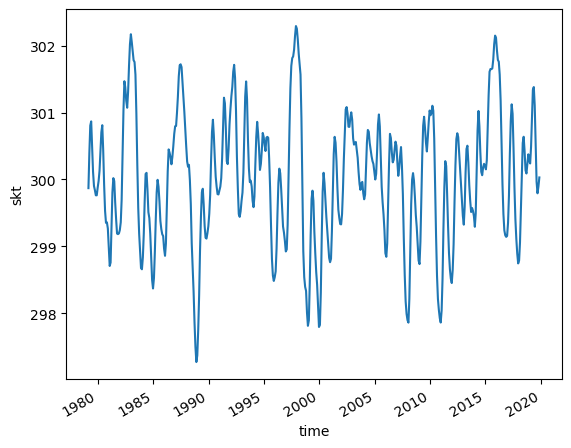

In [5]:
enso.plot()

## Regression plot

To visualize the teleconnection on a 2D plot functions in the `plots.py` are introduced.

<xarray.DataArray 'skt' (lat: 721, lon: 1440)>
dask.array<truediv, shape=(721, 1440), dtype=float64, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0

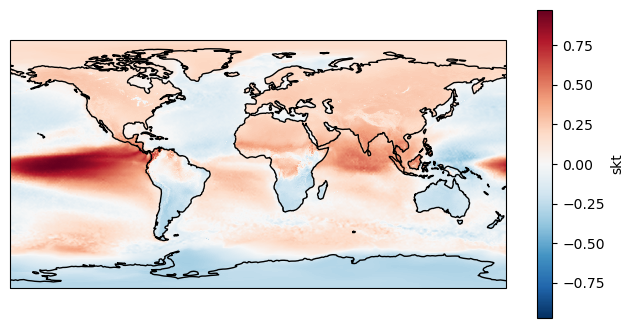

In [6]:
cor_plot(enso,field)